In [24]:
import torch
from torch import nn, Tensor
from torch.nn import functional as F
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt

import dataset
import models

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from torchvision import transforms
import pickle


In [2]:
scaler = RobustScaler()
composed = transforms.Compose([dataset.transforms.RandomPadding(5, 300)])

train = dataset.TraceDataset('C:/Workspace/CPA/data/method4/train', trace_size=35000, scaler=scaler, transform=composed)
test = dataset.TraceDataset('C:/Workspace/CPA/data/method4/test', trace_size=35000, scaler=scaler)

train_loader = DataLoader(train, batch_size=128, shuffle=True, pin_memory=True)
test_loader = DataLoader(test, batch_size=128, pin_memory=True)

In [3]:
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    check_finite=True
)

checkpoint = ModelCheckpoint(
    monitor='val_loss',
    filename='./model/checkpoints_{epoch:d}',
    verbose=True,
    save_last=True,
    save_top_k=2,
    mode='min'
)

logger = TensorBoardLogger('tb_logs', name=f'TestCNNModel', log_graph=True)

net = models.TestCNNModel(learning_rate=1e-4, weight_decay=1e-4)
# net.load_state_dict(torch.load('./model/CNNModel_case1_trained.params'))

In [4]:
trainer = pl.Trainer(max_epochs=50, gpus=1, callbacks=[early_stopping, checkpoint], logger=logger)
trainer.fit(net, train_loader, test_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\loggers\tensorboard.py:233: UserWarning: Could not log computational graph since the `model.example_input_array` attribute is not set or `input_array` was not given
  rank_zero_warn(

  | Name        | Type             | Params
-------------------------------------------------
0 | criterion   | CrossEntropyLoss | 0     
1 | sparse_conv | Sequential       | 88.7 K
2 | dense_conv  | Sequential       | 589 K 
3 | gap         | Sequential       | 0     
-------------------------------------------------
678 K     Trainable params
0         Non-trainable params
678 K     Total params
2.714     Total estimated model params size (MB)


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\deprecate\deprecation.py:115: LightningDeprecationWarning: The `accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.accuracy.accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLo

C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\result.py:405: LightningDeprecationWarning: One of the returned values {'correct', 'log', 'total'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  warning_cache.deprecation(


Epoch 0, global step 219: val_loss reached 5.54582 (best 5.54582), saving model to "tb_logs\TestCNNModel\version_4\checkpoints\./model/checkpoints_epoch=0.ckpt" as top 2


Epoch 1, global step 439: val_loss reached 5.54676 (best 5.54582), saving model to "tb_logs\TestCNNModel\version_4\checkpoints\./model/checkpoints_epoch=1.ckpt" as top 2


Epoch 2, global step 659: val_loss was not in top 2


Epoch 3, global step 879: val_loss was not in top 2


Epoch 4, global step 1099: val_loss was not in top 2


Epoch 5, global step 1319: val_loss was not in top 2


Epoch 6, global step 1539: val_loss was not in top 2


Epoch 7, global step 1759: val_loss was not in top 2


Epoch 8, global step 1979: val_loss was not in top 2
Saving latest checkpoint...


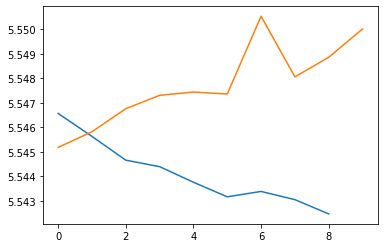

In [5]:
hist = net.get_history()

plt.plot(hist['train_loss'])
plt.plot(hist['val_loss'])
plt.show()

with open('./model/TestCNNModel_case4_trained.hist', 'wb') as f:
    pickle.dump(hist, f)
    f.close()

In [5]:
torch.save(net.state_dict(), './model/TestCNNModel_case1_trained.params')

In [6]:
#Validation

net = models.TestCNNModel()
net.load_state_dict(torch.load('./model/TestCNNModel_case1_trained.params'))

trainer = pl.Trainer(gpus=1)

scaler = RobustScaler()

test = dataset.TraceDataset('C:/Workspace/CPA/data/test', trace_size=35000, scaler=scaler)
test_loader = DataLoader(test, batch_size=64)
print('Validate for Case 1')
trainer.validate(net, dataloaders=test_loader)

test = dataset.TraceDataset('C:/Workspace/CPA/data/method1', trace_size=35000, scaler=scaler)
test_loader = DataLoader(test, batch_size=64)
print('Validate for Case 2')
trainer.validate(net, dataloaders=test_loader)

test = dataset.TraceDataset('C:/Workspace/CPA/data/method4/test', trace_size=35000, scaler=scaler)
test_loader = DataLoader(test, batch_size=64)
print('Validate for Case 3')
trainer.validate(net, dataloaders=test_loader)

test = dataset.TraceDataset('C:/Workspace/CPA/data/method2/test', trace_size=35000, scaler=scaler)
test_loader = DataLoader(test, batch_size=64)
print('Validate for Case 4')
trainer.validate(net, dataloaders=test_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validate for Case 1


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_acc': 0.8447265625, 'val_loss': 0.5473772883415222}
--------------------------------------------------------------------------------


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validate for Case 2


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_acc': 0.7895833253860474, 'val_loss': 0.7558923363685608}
--------------------------------------------------------------------------------


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validate for Case 3


C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_acc': 0.0033203125931322575, 'val_loss': 19.863590240478516}
--------------------------------------------------------------------------------
Validate for Case 4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\TecGun\anaconda3\envs\CPA\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_acc': 0.0044270833022892475, 'val_loss': 29.55570411682129}
--------------------------------------------------------------------------------


[{'val_loss': 29.55570411682129, 'val_acc': 0.0044270833022892475}]

In [15]:
from pytorch_lightning.metrics.functional import accuracy
import numpy as np

confusion_matrix = np.zeros((256, 256))

for _ in range(100):
    trace, key = next(iter(train_loader))

    res = net.forward(trace)
    idx = torch.argmax(res, dim=1)

    confusion_matrix[idx][key] += 1

    # res = net.forward(feat[0])
    # print(accuracy(res, feat[1]))
    # print(torch.argmax(res, dim=1))
    # print(feat[1])

import matplotlib.pyplot as plt

plt.imshow(confusion_matrix)

NameError: name 'train_loader' is not defined

In [12]:
torch.save(net.state_dict(), './model/TestCNN.params')

In [2]:
net = models.TestCNNModel(learning_rate=5e-5, weight_decay=1e-5)
net.load_state_dict(torch.load('./model/CNNModel_case1_trained.params'))
net.eval()

TestCNNModel(
  (criterion): CrossEntropyLoss()
  (conv): Sequential(
    (0): Conv1d(1, 2, kernel_size=(11,), stride=(4,), padding=(1,), bias=False)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(2, 4, kernel_size=(11,), stride=(4,), padding=(1,), bias=False)
    (4): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv1d(4, 8, kernel_size=(11,), stride=(4,), padding=(1,), bias=False)
    (7): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv1d(8, 16, kernel_size=(11,), stride=(4,), padding=(1,), bias=False)
    (10): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (fc): Sequential(
    (0): AdaptiveAvgPool1d(output_size=1024)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=16384, out_features=1024, bias=True)
    (3): ReLU(

In [8]:
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    check_finite=True
)

logger = TensorBoardLogger('tb_logs', name=f'fine_tuning', log_graph=True, default_hp_metric=True)

test = dataset.TraceDataset('./data/method2/test/', trace_size=35000, scaler=StandardScaler())
test_loader = DataLoader(test, batch_size=32, shuffle=True)
train = dataset.TraceDataset('./data/method2/train/', trace_size=35000, scaler=StandardScaler())
train_loader = DataLoader(train, batch_size=32, shuffle=True, pin_memory=True)

trainer = pl.Trainer(max_epochs=30, gpus=1, callbacks=[early_stopping], logger=logger)
trainer.fit(net, train_loader, test_loader)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


KeyboardInterrupt: 

In [1]:
test = dataset.TraceDataset('C:/Workspace/CPA/data/method1/test', trace_size=35000, scaler=StandardScaler())
test_loader = DataLoader(test, batch_size=1)

NameError: name 'dataset' is not defined

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams['lines.linewidth'] = 0.3
# plt.rcParams['text.color'] = 'white'
# plt.rcParams['ytick.color'] = 'white'
# plt.rcParams['axes.labelcolor'] = 'white'
# plt.rcParams['xtick.color'] = 'white'

softmax = nn.Softmax(dim=1)

corr: tensor([136])
pred: tensor([136])


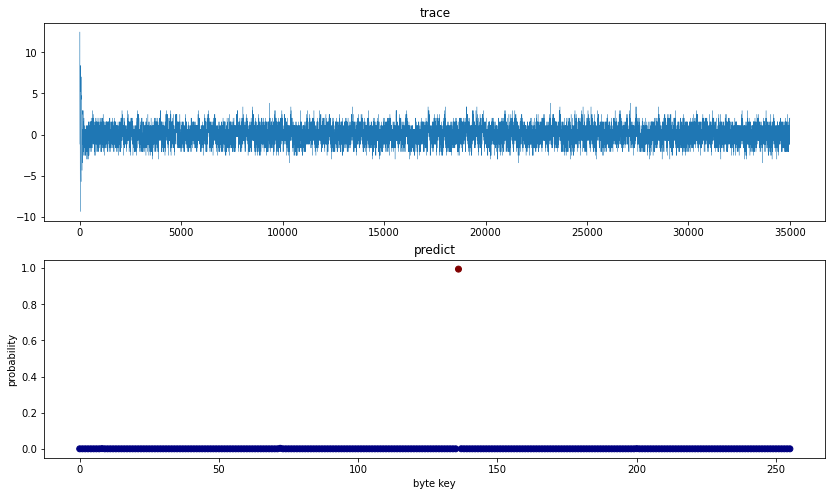

In [5]:
feat = next(iter(test_loader))

res = net.forward(feat[0])
res = softmax(res)

pred = torch.argmax(res, dim=1)

print(f'corr: {feat[1]}')
print(f'pred: {pred}')

res_np = res.squeeze().detach().numpy()

plt.subplot(211)
plt.title('trace')
plt.plot(feat[0].squeeze().detach().numpy())

plt.subplot(212)
plt.title('predict')
plt.xlabel('byte key'), plt.ylabel('probability')
plt.scatter(range(256), res_np, c=res_np, cmap='jet')

plt.show()

## Test set Confusion matrix

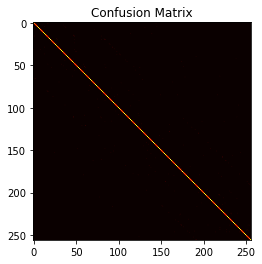

In [7]:
confusion_matrix = np.zeros((256, 256), dtype=np.uint8)

for trace, key in iter(test_loader):
    res = net.forward(trace)
    idx = torch.argmax(res, dim=1).detach()

    for x, y in zip(idx, key):
        confusion_matrix[x][y] += 1

plt.title('Confusion Matrix')
plt.imshow(confusion_matrix, cmap='hot')

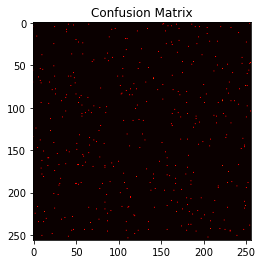

In [14]:
confusion_matrix = np.zeros((256, 256), dtype=np.uint8)

for _ in range(3):
    trace, key = next(iter(train_loader))
    res = net.forward(trace)
    idx = torch.argmax(res, dim=1).detach()

    for x, y in zip(idx, key):
        confusion_matrix[x][y] += 1

plt.title('Confusion Matrix')
plt.imshow(confusion_matrix, cmap='hot')

## 시각화

### Initialize

In [68]:
CASE1 = 'C:/Workspace/CPA/data/test'
CASE2 = 'C:/Workspace/CPA/data/method1'
CASE3 = 'C:/Workspace/CPA/data/method4/test'
CASE4 = 'C:/Workspace/CPA/data/method2/test'

from tqdm.notebook import tqdm

net = models.CNNModel()
net.load_state_dict(torch.load('./model/CNNModel_case1_trained.params'))

<All keys matched successfully>

### Visualize Function

In [69]:
def visualize(data_dir, title=None):
    test = dataset.TraceDataset(data_dir, trace_size=35000, scaler=StandardScaler())

    trace_cnt = len(test)//256

    fig = plt.figure(figsize=[11, 10])
    ax = fig.add_subplot(projection='3d')

    for key in tqdm(range(256)):
        #plt.title(f'Estimated Key Prob Distribution for Key({key}), Trace Count({trace_cnt})')

        for i in range(trace_cnt):
            arr = test[256*i + key][0]
            arr = np.expand_dims(arr, 1)

            res = F.softmax(net(Tensor(arr)), dim=1).detach().numpy()

            ax.scatter(range(256), [key]*256, res, c=res, cmap='jet', alpha=1.0 / trace_cnt)

        #plt.axvline(x=key, c='r', label='Truth', alpha=0.5)
        #plt.legend()

    if title:
        ax.set_title(title)
    ax.set_xlabel('Estimated Key')
    ax.set_ylabel('Real Key')
    ax.set_zlabel('Probability Distribution')

    plt.show()

### Visualize for Case 1

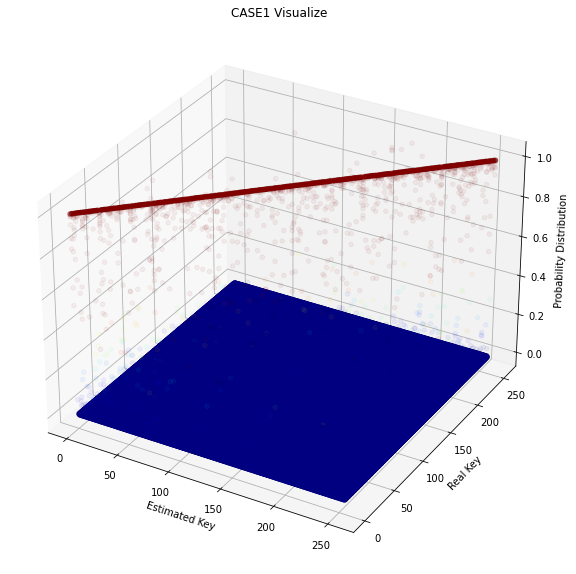

In [70]:
visualize(CASE1, 'CASE1 Visualize')


### Visualize for Case 2

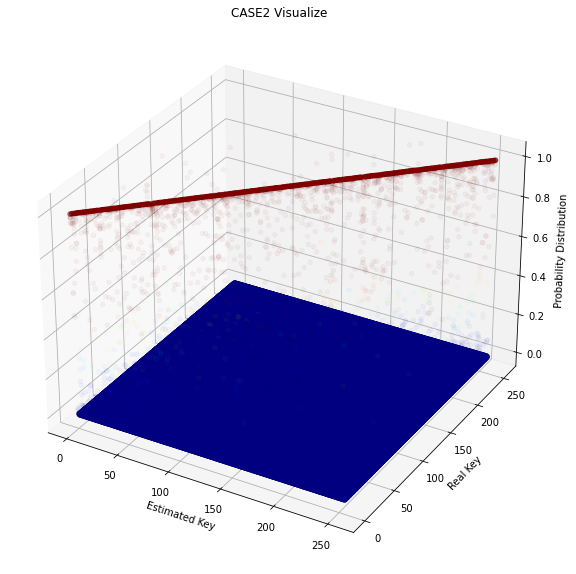

In [71]:
visualize(CASE2, 'CASE2 Visualize')

### Visualize for Case 3

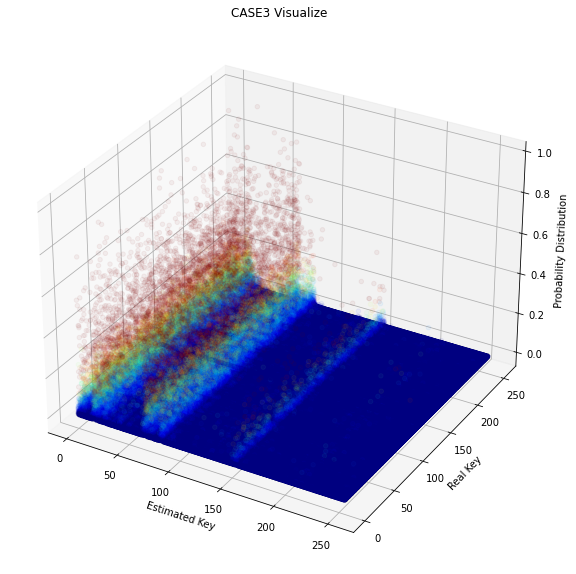

In [72]:
visualize(CASE3, 'CASE3 Visualize')

### Visualize for Case 4

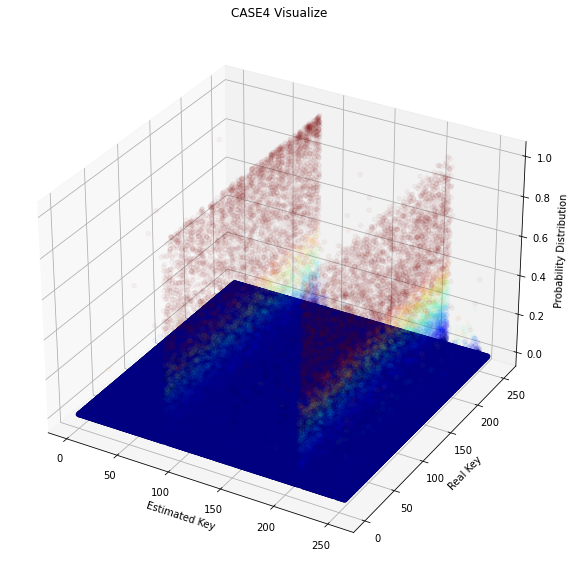

In [73]:
visualize(CASE4, 'CASE4 Visualize')

In [ ]:
feat = next(iter(test_loader))

res = net.forward(feat[0])
res = softmax(res)

pred = torch.argmax(res, dim=1)

print(f'corr: {feat[1]}')
print(f'pred: {pred}')

res_np = res.squeeze().detach().numpy()

plt.subplot(211)
plt.title('trace')
plt.plot(feat[0].squeeze().detach().numpy())

plt.subplot(212)
plt.title('predict')
plt.xlabel('byte key'), plt.ylabel('probability')
plt.scatter(range(256), res_np, c=res_np, cmap='jet')

plt.show()
